# Customer Segmentation using KMeans Clustering

### Objective:

This machine learning project uses customer data (age, income, and spending score) to group mall customers into distinct segments using **unsupervised learning (KMeans)**. These segments help businesses understand and target customers more effectively.

---

### Workflow Overview:

* **Import Libraries** – Load required Python packages
* **Load & Explore Data** – Understand dataset structure, missing values, and key features
* **Feature Selection** – Choose relevant variables for clustering
* **Optimal Clusters (Elbow Method)** – Use WCSS to identify the best number of clusters
* **Model Training** – Apply KMeans clustering to segment customers
* **Visualization** – Plot customer segments and centroids
* **Label Clusters** – Assign meaningful names to each customer group

---

### Problem Type:

Unsupervised Learning – **Clustering**

---

### Dataset:

**Source:** [Customer Segmentation Dataset on Kaggle](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

**Rows:** 200 customers

**Features:**

* **CustomerID:** Unique customer ID
* **Gender:** Male or Female
* **Age:** Age of the customer
* **Annual Income (k\$):** Income in thousands of dollars
* **Spending Score (1–100):** Score based on mall spending behavior

---

### Output:

A labeled dataset with customers segmented into 5 groups such as:

* High Income – High Spenders
* Low Income – High Spenders
* Moderate Spenders
* Cautious Buyers
* Budget Shoppers

---




# Step - 1
### Importing Dependencies
Using `NumPy` and `Pandas` for data handling, `Matplotlib` and `Seaborn` for visualization, and `Scikit-learn` for clustering (KMeans).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Step - 2
### Data Collection and Preprocessing

In [2]:
# Load a CSV file into a DataFrame
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
# Print first few rows of data
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Dataset Description:**

- `CustomerID`: Unique identifier for each customer.
- `Gender`: Gender of the customer (`Male` or `Female`).
- `Age`: Age of the customer.
- `Annual Income (k$)`: The customer's annual income in thousands of dollars.
- `Spending Score (1-100)`: Score assigned by the mall based on spending behavior. A higher score usually indicates a higher tendency to spend.



In [4]:
# Print the dimension of our dataset (rows,columns)
customer_data.shape

(200, 5)

In [5]:
# Display basic info including data types and missing values
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Check for missing values in each column
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


***Seprating data for further analysis***

Selecting features for clustering: 'Annual Income (k$)' and 'Spending Score (1-100)'


In [7]:
X = customer_data.iloc[:,[3,4]].values

- Format of .iloc:
```
.iloc[<row_index_selection>, <column_index_selection>]
```
In this case:
    - `:` (for rows): This means select all rows.
    - `[3, 4]` (for columns): This means select columns with index 3 and 4.

In [8]:
# Print first 5 rows
print(X[:5])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


# Step - 3
### Data Analysis

Choosing the optimal number of clusters using the Elbow Method


#### What is WCSS?

- WCSS stands for "Within-Cluster Sum of Squares".
- It measures the total variance within each cluster.
- Lower WCSS means tighter clusters (i.e., data points are closer to the cluster centroid).

#### Formula:
For each cluster:

```
    WCSS = Σ (distance between each point and the centroid of its cluster)²
```

Total WCSS = Sum of all individual cluster WCSS values.

#### Why we use it:
- To evaluate how well the data points fit into clusters.
- Helps determine the optimal number of clusters (K) using the **Elbow Method**.

#### Elbow Method:
- Plot WCSS vs. number of clusters (K).
- The "elbow" point (where the curve bends) indicates the best K.



In [12]:
# Finding WCSS values for different numbers of clusters (1 to 10)

wcss = []  # Empty list to store WCSS values

for i in range (1,11):

  # Create and fit the KMeans model with i clusters
  kmeans = KMeans(n_clusters = i , init = 'k-means++' , random_state = 42)
  kmeans.fit(X)

  # Append the WCSS (inertia) to the list
  wcss.append(kmeans.inertia_)

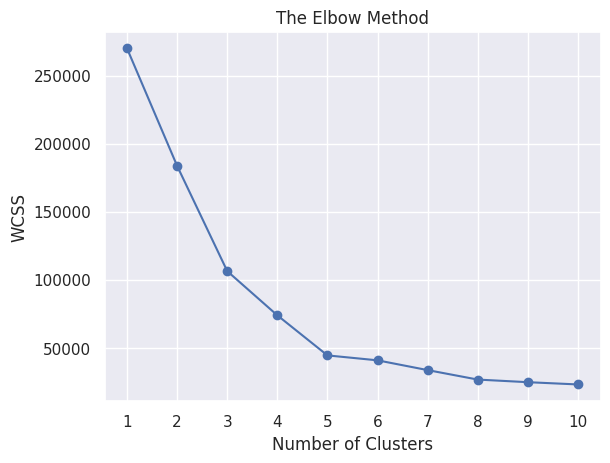

In [14]:
# Plotting the Elbow Graph
sns.set()  # Use seaborn style
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

***Optimal Number of Clusters:***

- From the elbow plot, the WCSS starts to drop (level off) at **K = 3** and **K = 5**.  
- But after **K = 5** there is no significant dip.
- This suggests that 5 is a good number of clusters for this dataset.


# Step - 4
### Model Training

In [15]:
# Load an instance of the KMeans Clustering model
kmeans = KMeans(n_clusters= 5 , init= 'k-means++' , random_state=0)

# return the label for each data point based on their clusters
Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


# Step - 5
### Model Visualization

- X-axis → Annual Income
- Y-axis → Spending Score
- Black dots → Centroids (center of each cluster)

#### Clustering works by:

1. Placing initial centroids.
2. Assigning each point to the nearest centroid (one point belongs to one cluster).
3. Moving centroids to the center of their assigned points.
4. Repeating steps 2–3 until clusters stabilize.

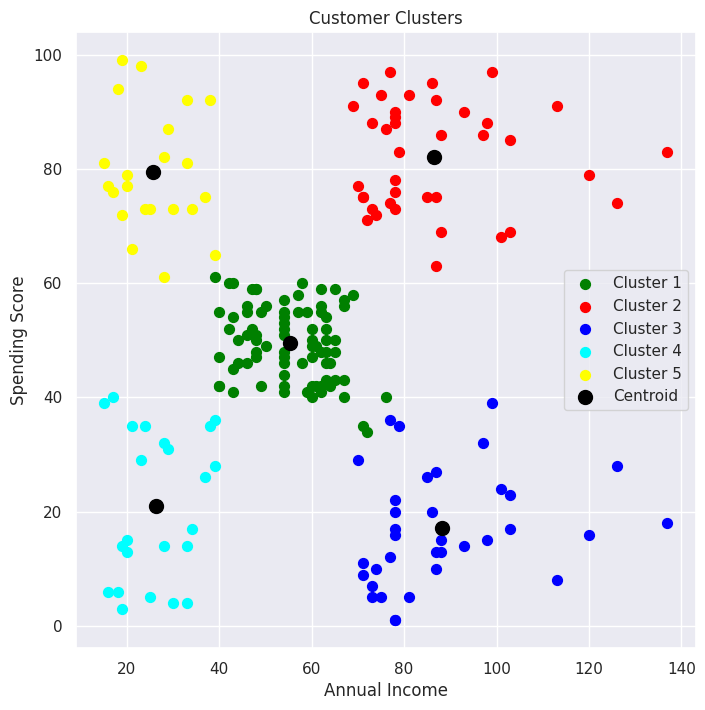

In [20]:
plt.figure(figsize=(8, 8))  # Set the figure size for the plot

# Plotting data points belonging to each cluster separately using color & label
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s=50, c='yellow', label='Cluster 5')

# Explanation:
# - X[Y == i, 0] → selects Annual Income of cluster i
# - X[Y == i, 1] → selects Spending Score of cluster i
# - s = size of points
# - c = color of the cluster
# - label = label for legend



# Plotting the centroids of all clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c='black', label='Centroid')

# - kmeans.cluster_centers_ gives coordinates of cluster centers (centroids).
# - [:, 0] → Annual Income coordinate
# - [:, 1] → Spending Score coordinate



# Final Plot Settings
plt.title('Customer Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


Customers naturally group based on income and spending patterns.

Found 5 clusters, like:
- High income, high spenders – ideal target customers
- Low income, high spenders – impulsive buyers
- High income, low spenders – cautious buyers
- Moderate income & spenders – average customers

Businesses can use this for personalized marketing and customer segmentation.

In [21]:
customer_data['Cluster'] = Y

# Optional: Assign custom labels for business insight
cluster_labels = {
    0: 'Moderate Spenders',
    1: 'High Income Low Spenders',
    2: 'Low Income High Spenders',
    3: 'High Income High Spenders',
    4: 'Low Income Low Spenders'
}

customer_data['Segment'] = customer_data['Cluster'].map(cluster_labels)
print(customer_data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster                    Segment  
0        3  High Income High Spenders  
1        4    Low Income Low Spenders  
2        3  High Income High Spenders  
3        4    Low Income Low Spenders  
4        3  High Income High Spenders  


#### What We Did:

1. **`customer_data['Cluster'] = Y`**
   → Added the cluster number (0 to 4) for each customer.

2. **Mapped cluster numbers to names**
   → Used a dictionary to give each cluster a meaningful label (like "High Income High Spenders").

3. **`customer_data['Segment'] = customer_data['Cluster'].map(cluster_labels)`**
   → Created a new column with those readable segment names.

---

#### Why?

So we can understand and explain **what kind of customer** is in each cluster — useful for marketing and decision-making.
